In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
from transformers import AutoModelForCausalLM, AutoTokenizer

from lexical_reflections.utils.device import DEVICE

model = AutoModelForCausalLM.from_pretrained("Qwen/Qwen2.5-0.5B")
model.to(DEVICE)
model.eval()
tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen2.5-0.5B")

In [14]:
import json

toy_data = None
with open("../../data/toy_data.json") as f:
    toy_data = json.load(f)

In [15]:
from lexical_reflections.gather_data.hidden_space import collect_hidden_space_by_language

hidden_space_by_language = collect_hidden_space_by_language(model, tokenizer, toy_data)

Data len:  11


100%|██████████| 11/11 [00:00<00:00, 11.28it/s]


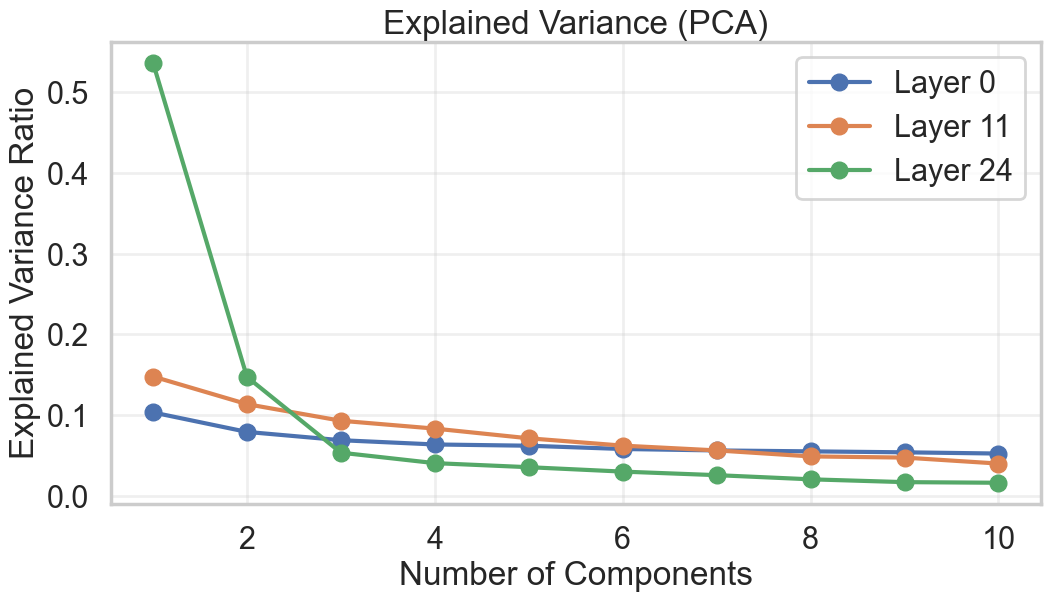

In [16]:
from lexical_reflections.pca.process_hidden_space import extract_pca_components, project_onto_pca
from lexical_reflections.pca.visualize import visualize_explained_variance

pca_components, pca_means, explained_variance_ratios = extract_pca_components(hidden_space_by_language)
projections, _ = project_onto_pca(hidden_space_by_language, pca_components, pca_means)

visualize_explained_variance(pca_components, explained_variance_ratios)

Data len:  11


100%|██████████| 11/11 [00:00<00:00, 21.95it/s]

[EN] Average cosine similarity for last layer: 0.6012089848518372
[RU] Average cosine similarity for last layer: 0.4437330961227417


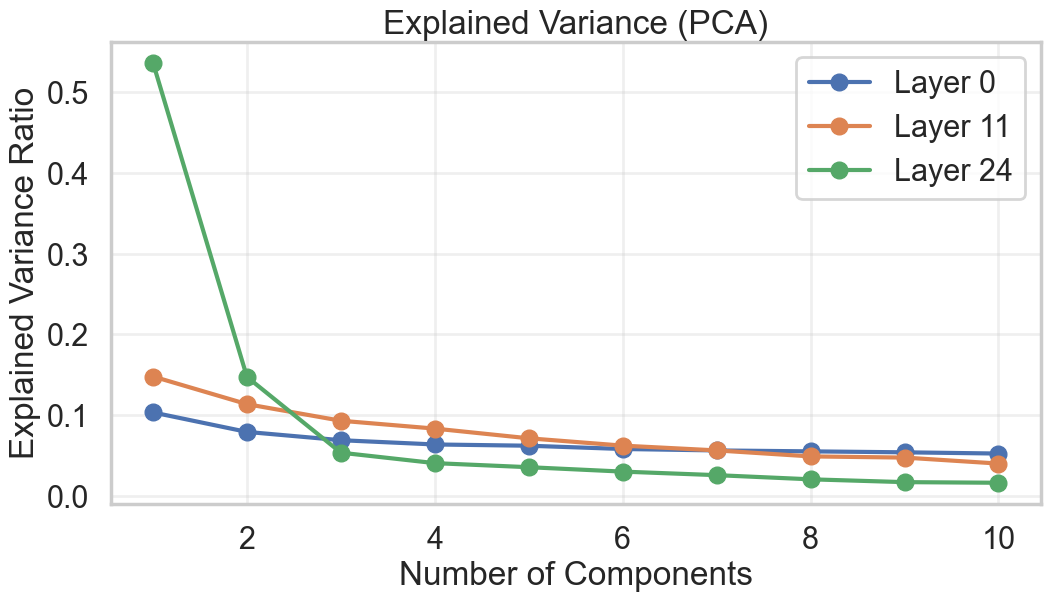

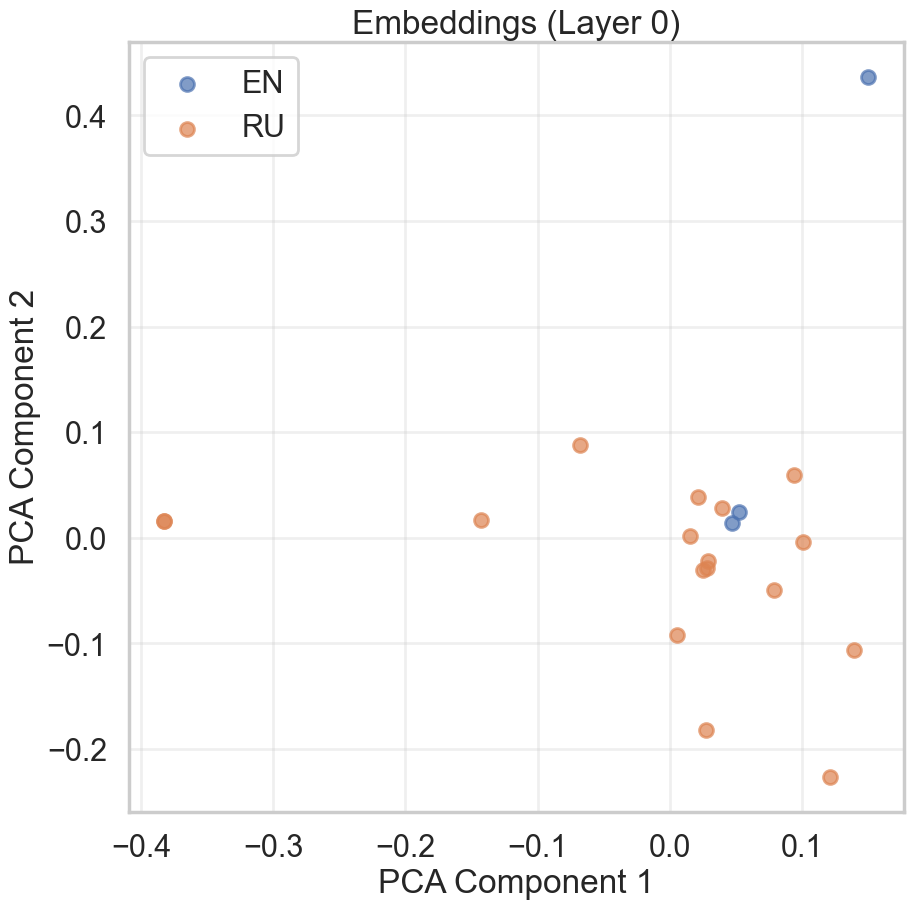

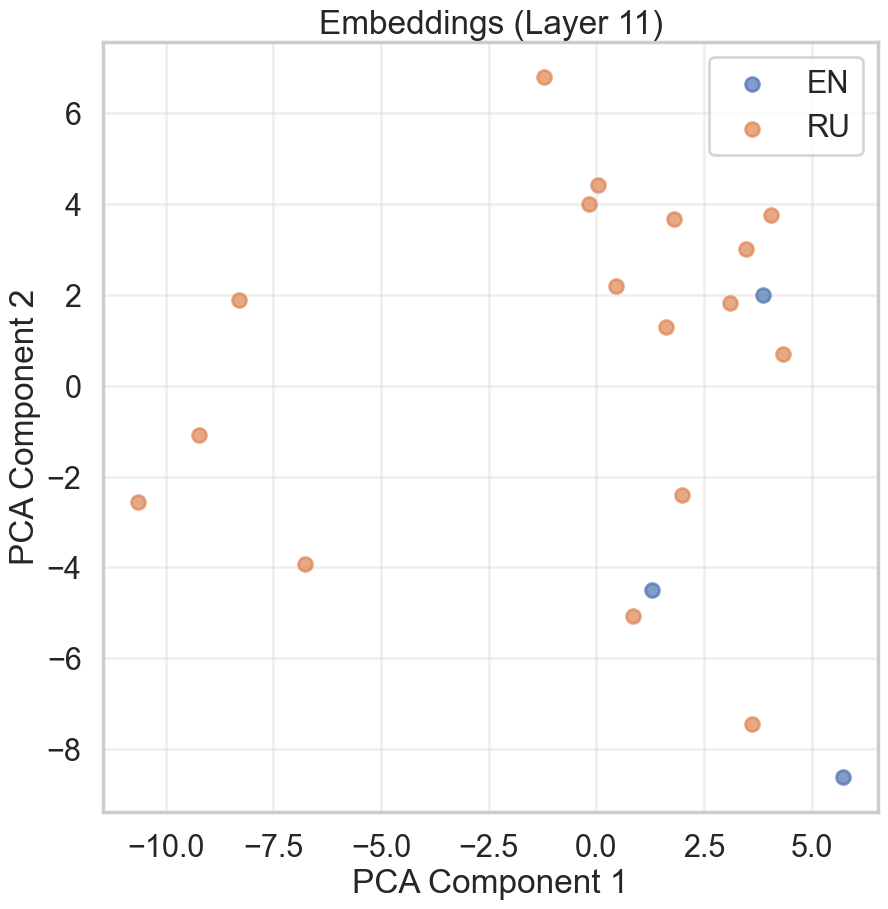

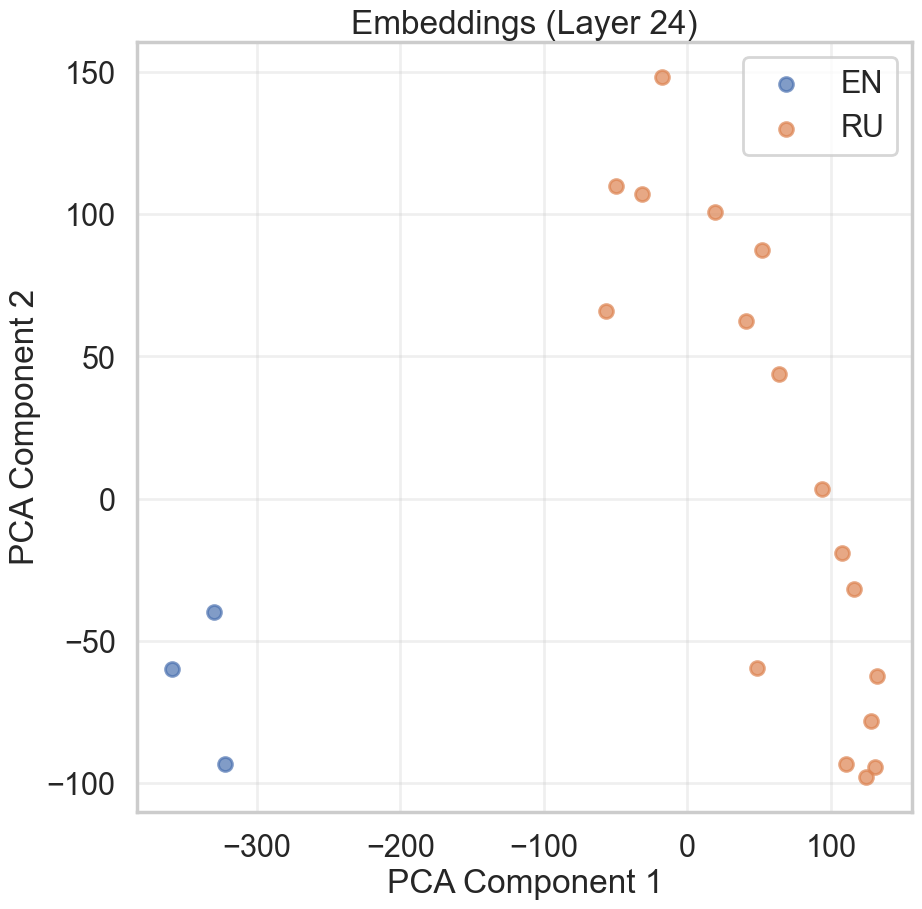

In [17]:
from lexical_reflections.gather_data.hidden_space import collect_hidden_space_by_language
from lexical_reflections.pca.analyze import project_onto_pca
from lexical_reflections.pca.visualize import visualize_explained_variance, visualize_projections

hidden_space_by_language = collect_hidden_space_by_language(model, tokenizer, toy_data)

projections, cosine_similarities = project_onto_pca(hidden_space_by_language, pca_components, pca_means)

for k, v in cosine_similarities.items():
    print(f"[{k}] Average cosine similarity for last layer: {v[-1].diagonal().mean()}")

visualize_explained_variance(pca_components, explained_variance_ratios)
visualize_projections(hidden_space_by_language, projections)